## Observations and Insights
1. Looking at the bar graph data, we can see that the most used drug was Capomulin (230) and the least used drug was tied between Ceftamin and Infubinol (178). This shows that Capomulin was the most popular drug of the study.

2. Looking at the pie graph data, we can see that out of the 248 mice that were tested, 123 of them were female (49.6%) and 125 of them were male (50.4%). This shows the distribution between male and female was nearly equal. 

3. Looking at the line graph data, we can see that the drug Capomulin decreased the tumor volume for mouse s185 over a 40+ day period. This shows that the drug Capomulin is an effective treatment, at least for mouse s185. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice = pd.DataFrame(duplicate_mice)
all_duplicate_mice

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
dr_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
dr_mean

dr_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
dr_median

dr_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
dr_variance

dr_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
dr_std

dr_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
dr_sem
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": dr_mean, "Median": dr_median, "Variance": dr_variance,
                           "Standard Deviation": dr_std, "SEM": dr_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_line_stats = clean_df.groupby("Drug Regimen")
summary_df_2 = single_line_stats.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

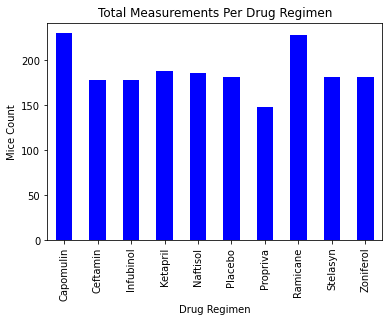

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_measurements = clean_df.groupby("Drug Regimen").count()["Mouse ID"]
mice_measurements.plot(kind="bar", color="blue")
plt.title("Total Measurements Per Drug Regimen")
plt.ylabel("Mice Count")

mice_measurements

(0.0, 240.0)

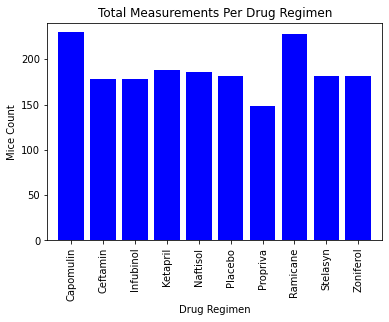

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(mice_measurements))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice_measurements, color='b')
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol", 
                            "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")

plt.title("Total Measurements Per Drug Regimen")

plt.xlabel("Drug Regimen")
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylabel("Mice Count")
plt.ylim(0, max(mice_measurements)+10)

In [11]:
#Create a DataFrame For Mice Gender 
gender_data = clean_df.groupby("Sex")

total_gender = gender_data.nunique()["Mouse ID"]

gender_percentage = (total_gender/clean_mice_count)*100

mice_gender = pd.DataFrame({"Total Count": total_gender,
                           "Percentage": gender_percentage})

mice_gender

,Total Count,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


(-1.2084842569102061,
 1.1068386815333482,
 -1.1032477084141097,
 1.1014817096939398)

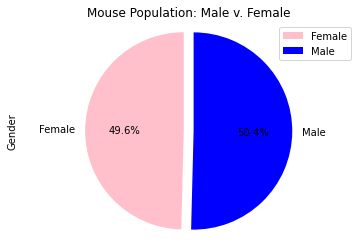

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["pink", "blue"]
explode =(0.1,0)
mice_gender.plot(kind="pie", y="Total Count", colors=colors, explode=explode, autopct="%1.1f%%", startangle=90)
plt.title("Mouse Population: Male v. Female")
plt.ylabel("Gender")
plt.axis("equal")

(-1.2084573873000366,
 1.106824580180893,
 -1.1032241903366078,
 1.1014699778143722)

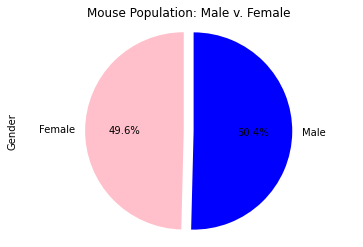

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["pink", "blue"]
sizes = [49.6, 50.4]
explode = (0.1,0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=90)
plt.title("Mouse Population: Male v. Female")
plt.ylabel("Gender")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_vol = pd.merge(capomulin_last, clean_df, on=("Mouse ID", "Timepoint"))
ramicane_vol = pd.merge(ramicane_last, clean_df, on=("Mouse ID", "Timepoint"))
infubinol_vol = pd.merge(infubinol_last, clean_df, on=("Mouse ID", "Timepoint"))
ceftamin_vol = pd.merge(ceftamin_last, clean_df, on=("Mouse ID", "Timepoint"))

In [15]:
# Capomulin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_tumors = capomulin_vol["Tumor Volume (mm3)"]
quartiles = capomulin_tumors.quantile([.25,.5,.75])
upperq = quartiles[.75]
lowerq = quartiles[.25]
iqr = upperq - lowerq

print(f"The upper quartile of Capomulin tumors is {upperq}.")
print(f"The median quartile of Campomulin tumors is {quartiles[.5]}.")
print(f"The lower quartile of Capomulin tumors is {lowerq}.")
print(f"The interquartile range of Capomulin tumors is {iqr}.")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)
    
print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The upper quartile of Capomulin tumors is 40.1592203.
The median quartile of Campomulin tumors is 38.125164399999996.
The lower quartile of Capomulin tumors is 32.37735684.
The interquartile range of Capomulin tumors is 7.781863460000004.
Values below 20.70456164999999 and above 51.83201549 could be outliers.


In [16]:
# Ramicane: Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_tumors = ramicane_vol["Tumor Volume (mm3)"]
quartiles = ramicane_tumors.quantile([.25,.5,.75])
upperq = quartiles[.75]
lowerq = quartiles[.25]
iqr = upperq - lowerq

print(f"The upper quartile of Ramicane tumors is {upperq}.")
print(f"The median quartile of Ramicane tumors is {quartiles[.5]}.")
print(f"The lower quartile of Ramicane tumors is {lowerq}.")
print(f"The interquartile range of Ramicane tumors is {iqr}.")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The upper quartile of Ramicane tumors is 40.65900627.
The median quartile of Ramicane tumors is 36.56165229.
The lower quartile of Ramicane tumors is 31.56046955.
The interquartile range of Ramicane tumors is 9.098536719999998.
Values below 17.912664470000003 and above 54.30681135 could be outliers.


In [17]:
# Infubinol: Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_tumors = infubinol_vol["Tumor Volume (mm3)"]
quartiles = infubinol_tumors.quantile([.25,.5,.75])
upperq = quartiles[.75]
lowerq = quartiles[.25]
iqr = upperq - lowerq    

print(f"The upper quartile of Infubinol tumors is {upperq}.")
print(f"The median quartile of Infubinol tumors is {quartiles[.5]}.")
print(f"The lower quartile of Infubinol tumors is {lowerq}.")
print(f"The interquartile range of Infubinol tumors is {iqr}.")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The upper quartile of Infubinol tumors is 65.52574285.
The median quartile of Infubinol tumors is 60.16518046.
The lower quartile of Infubinol tumors is 54.04860769.
The interquartile range of Infubinol tumors is 11.477135160000003.
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [18]:
# Ceftamin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_tumors = ceftamin_vol["Tumor Volume (mm3)"]
quartiles = ceftamin_tumors.quantile([.25,.5,.75])
upperq = quartiles[.75]
lowerq = quartiles[.25]
iqr = upperq - lowerq   

print(f"The upper quartile of Ceftamin tumors is {upperq}.")
print(f"The median quartile of Ceftamin tumors is {quartiles[.5]}.")
print(f"The lower quartile of Ceftamin tumors is {lowerq}.")
print(f"The interquartile range of Ceftamin tumors is {iqr}.")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")

The upper quartile of Ceftamin tumors is 64.29983003.
The median quartile of Ceftamin tumors is 59.85195552.
The lower quartile of Ceftamin tumors is 48.72207785.
The interquartile range of Ceftamin tumors is 15.577752179999997.
Values below 25.355449580000002 and above 87.66645829999999 could be outliers.


Text(0.5, 0, 'Drug Regimen')

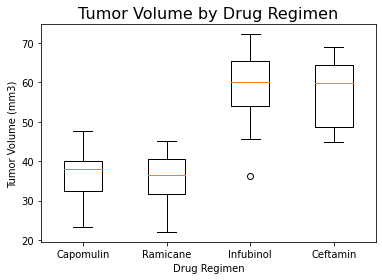

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_list = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.boxplot(plot_list, labels=Regimen)
ax1.set_title("Tumor Volume by Drug Regimen", fontsize=16)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize=10)
ax1.set_xlabel("Drug Regimen", fontsize=10)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

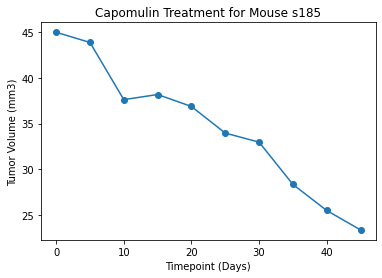

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df
line_graph = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
line_graph.head()

x_axis = line_graph["Timepoint"]
tumor_volume = line_graph["Tumor Volume (mm3)"]

plt.plot(x_axis, tumor_volume, marker='o')
plt.title("Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 0, 'Weight (g)')

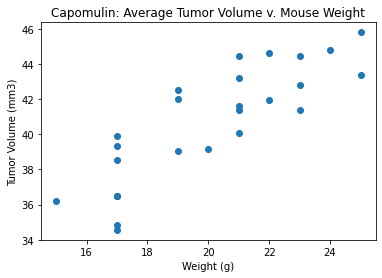

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"])
plt.title("Capomulin: Average Tumor Volume v. Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {correlation}.")

The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84.


Text(0, 0.5, 'Tumor Volume (mm3)')

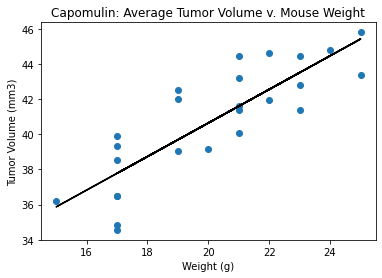

In [23]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Tumor Volume (mm3)"]

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(x_values, y_values)
cap_fit = cap_slope * x_values + cap_int
plt.plot(x_values, cap_fit, "-", color="black")
plt.scatter(x_values, y_values)
plt.title("Capomulin: Average Tumor Volume v. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")